 ## Our 3 datasets are :
 
 ### 2 of them about software and IT 
 
 ###  1 of them have alot of categories
 
 ### first i will merge the firt 2 datasets and make processing to take insights from them
 
 ### then i will merge the last one 
 
 
## LET'S BEGIN :>

## import important packages

In [1]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('wuzzaf_2020 (1).csv')
data1.head()

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo"
3,https://wuzzuf.net/a/IT-Software-Development-J...,Senior Software Quality Control Engineer,Bnsights,Senior Software Quality Control Engineer,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo"
4,https://wuzzuf.net/a/IT-Software-Development-J...,Senior E-Commerce Software Developer (Magento 2),shop4build,Senior E-Commerce Software Developer (Magento 2),https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo"


In [3]:
# Take imp features
features = ['title','company-name','short-description-']
d = data1[features]

In [4]:
d.head()

,title,company-name,short-description-
0,Sales Supervisor - North Upper Egypt,PepsiCo International,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...
2,Software Developer,Rednet It Services,Full Time · Experienced · 2-3 Yrs of Exp · Sof...
3,Senior Software Quality Control Engineer,Bnsights,Full Time · Experienced · 3-5 Yrs of Exp · Com...
4,Senior E-Commerce Software Developer (Magento 2),shop4build,Full Time · Part Time · Work From Home · Exper...


In [5]:
d.rename(columns={'title': 'Job_Title',
                     'company-name':'Company_Name', 
                     'short-description-': 'Job_Description'}
                          , inplace=True);
d.head()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Job_Title,Company_Name,Job_Description
0,Sales Supervisor - North Upper Egypt,PepsiCo International,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...
2,Software Developer,Rednet It Services,Full Time · Experienced · 2-3 Yrs of Exp · Sof...
3,Senior Software Quality Control Engineer,Bnsights,Full Time · Experienced · 3-5 Yrs of Exp · Com...
4,Senior E-Commerce Software Developer (Magento 2),shop4build,Full Time · Part Time · Work From Home · Exper...


### New data from wuzzuf 

In [6]:
x=list(range(130))
limit=2500
keys=0
urls=[]
for i in x:
    key=keys
    y = str(key)
    url='https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start='+y
    urls.append(url)
    keys+=20
    if key==limit:
        break

In [7]:
f= open("ًwuzzaf_2021.csv","w",encoding='utf-8')
header = "job_title  ,company_names , job_description\n"
f.write(header) 
for url in urls:
    print(url)    
    client=urlopen(url)
    html= client.read()
    client.close()
    soup = bs(html,"html.parser")
    containers = soup.find_all("div",{"class":"result-wrp row"}) 
    for container in containers:
    
        job_job = container.findAll("h2",{"class":"job-title"})
        job_title = job_job[0].text.strip()    
        company_name = container.findAll("span",{"class":"company-name"})
        company_names = company_name[0].text.strip()     
        job_type = container.findAll("div",{"class":"job-details"})
        job_description = job_type[0].text.strip()
        job_description = ' '.join(job_description.split())
        f.write(job_title + ", " + company_names +", " + job_description + "\n")    
        
f.close()

https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=0
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=20
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=40
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=60
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=80
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=100
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=120
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=140
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=160
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=180
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=200
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=220
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=240
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=260
https://wuzzuf.net/a/IT-Software-Develop

In [8]:
# Read data as csv file
# index_col = false to force pandas to not use the first column as the index
new_data =pd.read_csv("ًwuzzaf_2021.csv" , error_bad_lines=False, index_col=False)
# Make a copy from data 
d2 = new_data.copy()

b'Skipping line 683: expected 4 fields, saw 5\nSkipping line 689: expected 4 fields, saw 5\nSkipping line 718: expected 4 fields, saw 5\nSkipping line 736: expected 4 fields, saw 5\nSkipping line 823: expected 4 fields, saw 6\nSkipping line 855: expected 4 fields, saw 5\nSkipping line 870: expected 4 fields, saw 5\nSkipping line 871: expected 4 fields, saw 5\nSkipping line 914: expected 4 fields, saw 5\nSkipping line 991: expected 4 fields, saw 5\nSkipping line 1003: expected 4 fields, saw 5\nSkipping line 1030: expected 4 fields, saw 5\nSkipping line 1039: expected 4 fields, saw 5\nSkipping line 1045: expected 4 fields, saw 5\nSkipping line 1461: expected 4 fields, saw 5\nSkipping line 1484: expected 4 fields, saw 5\nSkipping line 1554: expected 4 fields, saw 5\nSkipping line 1585: expected 4 fields, saw 5\nSkipping line 1645: expected 4 fields, saw 5\nSkipping line 1808: expected 4 fields, saw 5\nSkipping line 2062: expected 4 fields, saw 5\nSkipping line 2164: expected 4 fields, saw

In [9]:
# Rename columns to match 1st dataset names
d2.rename(columns={'job_title  ': 'Job_Title',
                     'company_names ':'Company_Name', 
                     ' job_description': 'Job_Description'}
                          , inplace=True)

In [10]:
d2.head()

,Job_Title,Company_Name,Job_Description
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...


## Merge data sets together 

In [12]:
all_data = [d2 , d]
jobs = pd.concat(all_data)

In [13]:
jobs = jobs.reset_index(drop = True)

In [14]:
len(d2) + len(d)

5075

## 1. Check null values in dataset

In [15]:
jobs.isnull().sum()

Job_Title          0
Company_Name       0
Job_Description    0
dtype: int64

## 2. Some Countries Hide Their name:|

In [16]:
jobs['Company_Name'].replace(' ', np.nan, inplace=True) 

In [17]:
jobs['Company_Name'].isnull().sum()

277

In [18]:
# fill nulls with 'hidden name'
jobs['Company_Name'].fillna("Hidden Name",inplace=True)

In [19]:
jobs['Company_Name'].value_counts()

Hidden Name                                         277
 Confidential                                       261
 FlairsTech                                          40
 Cegedim                                             31
Ghassan Ahmed Alsulaiman for Electronic Services     21
                                                   ... 
 Integrated Technology Group                          1
 justagain                                            1
 shop4build                                           1
Mintra - Misr for Industry and Trade                  1
 Brantu AB                                            1
Name: Company_Name, Length: 1941, dtype: int64

## See The Top 10 Companies that offers IT/Software JOBS

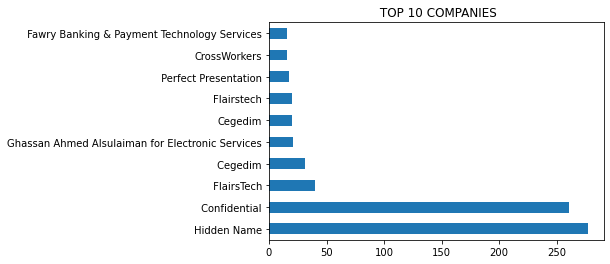

In [20]:
jobs['Company_Name'].value_counts()[:10].plot(kind = 'barh' , title = ' TOP 10 COMPANIES')

# 3. Seperate Levels from Description in seperated column

In [21]:
Level_list=[]
for level in jobs['Job_Description']:
    if('Entry Level' in level):
        Level_list.append('Entry Level')
    elif('Experienced' in level):
        Level_list.append('Experienced')
    elif('Manager'or 'Senior Management'in level):
        Level_list.append('Manager')
    elif('Internship'in level):
        Level_list.append('Internship')
    else:
        Level_list.append(level)    

In [22]:
len(Level_list)

5075

In [23]:
jobs['Level']=Level_list

In [24]:
jobs.head()

,Job_Title,Company_Name,Job_Description,Level
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Experienced
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,Experienced
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Entry Level
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,Experienced


# 4. Seperate type of JOB in seperate column

In [25]:
Type_list=[]
for job_type in jobs['Job_Description']:
    if('Full Time' in job_type):
        Type_list.append('Full Time')
       
    elif('Internship' in job_type):
        Type_list.append('Internship')
       
    elif('Full Time'and'Part Time' in job_type):
        Type_list.append('Full Time And Part Time')
       
    elif('Full Time 'and' Part Time 'and' Work From Home'in job_type):
        Type_list.append('Full Time And Part Time And Work From Home')
       
    elif('Part Time'in job_type):
        Type_list.append('Part Time')
       
    else:
        Type_list.append('Full Time')  

In [26]:
len(Type_list)

5075

In [27]:
jobs['Type'] = Type_list

In [28]:
jobs.tail()

,Job_Title,Company_Name,Job_Description,Level,Type
5070,Senior .Net Developer (NetEDI),Cegedim,Full Time · Experienced · 5+ Yrs of Exp · C# ·...,Experienced,Full Time
5071,Senior Front End Developer,Automated Systems,Full Time · Experienced · 3+ Yrs of Exp · Git ...,Experienced,Full Time
5072,Senior PHP Developer - Nasr City,Maxycode,Full Time · Experienced · 3-10 Yrs of Exp · So...,Experienced,Full Time
5073,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,Manager,Internship
5074,Php Back-end Developer,IPC,Full Time · Experienced · 2-5 Yrs of Exp · PHP...,Experienced,Full Time


In [29]:
title = jobs['Job_Title'].value_counts()
title

IT Specialist                       37
Graphic Designer                    30
Front End Developer                 30
IT Help Desk Specialist             28
Full Stack Developer                27
                                    ..
Senior GIS Software Engineer         1
IT Service Desk Officer              1
SLA Manager                          1
Senior Software Developer - Java     1
Service Engineer (Docucare)          1
Name: Job_Title, Length: 3206, dtype: int64

# What is most offered jobs?


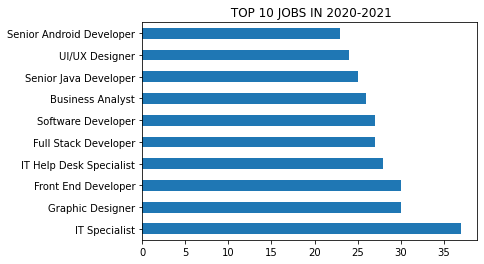

In [30]:
title = jobs['Job_Title'].value_counts()[:10]
title.plot(kind='barh', title= ' TOP 10 JOBS IN 2020-2021' )

# 5. Make the Category of Job (IT, Software Engineering )

In [31]:
t=[]
for title in jobs['Job_Title']:
    if("IT" in title):
        t.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in title):
        t.append('Software Engneering ')
    else:
        t.append(title)

In [32]:
len(t)

5075

In [33]:
jobs['Job_Category'] = t

In [34]:
jobs

,Job_Title,Company_Name,Job_Description,Level,Type,Job_Category
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Entry Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,Experienced,Full Time,Software Engneering
...,...,...,...,...,...,...
5070,Senior .Net Developer (NetEDI),Cegedim,Full Time · Experienced · 5+ Yrs of Exp · C# ·...,Experienced,Full Time,Software Engneering
5071,Senior Front End Developer,Automated Systems,Full Time · Experienced · 3+ Yrs of Exp · Git ...,Experienced,Full Time,Software Engneering
5072,Senior PHP Developer - Nasr City,Maxycode,Full Time · Experienced · 3-10 Yrs of Exp · So...,Experienced,Full Time,Software Engneering
5073,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,Manager,Internship,Software Engneering


In [35]:
jobs['Job_Category'].value_counts()

Software Engneering     4753
IT Category              322
Name: Job_Category, dtype: int64

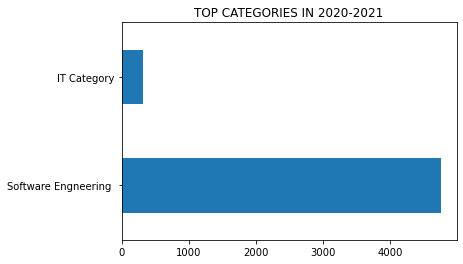

In [36]:
jobs['Job_Category'].value_counts().plot(kind = 'barh' ,title= 'TOP CATEGORIES IN 2020-2021')

In [37]:
jobs.head()

,Job_Title,Company_Name,Job_Description,Level,Type,Job_Category
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Entry Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,Experienced,Full Time,Software Engneering


In [38]:
jobs['Job_Description'] = jobs['Job_Description'].str.replace('Full Time ·' or 'Part Time .' or 'Internship .' , '')

In [39]:
jobs['Job_Description'] = jobs['Job_Description'].str.replace('Experienced .' or 'Entry Level .' or 'Entry Level' or 'Internship'
                                                              'Internship .' or 'Manager .' ,'')

In [41]:
jobs['Job_Description'] = jobs['Job_Description'].str.replace('Entry Level ·','')

In [42]:
jobs

,Job_Title,Company_Name,Job_Description,Level,Type,Job_Category
0,Business Development Specialist - Upper Egypt,golden,2+ Yrs of Exp · Business Development · Sale...,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,4+ Yrs of Exp · Software · Software Enginee...,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,6-10 Yrs of Exp · Software Development · In...,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,0-2 Yrs of Exp · Computer Science · Informa...,Entry Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,4-12 Yrs of Exp · AL Language · Azure SQL ·...,Experienced,Full Time,Software Engneering
...,...,...,...,...,...,...
5070,Senior .Net Developer (NetEDI),Cegedim,5+ Yrs of Exp · C# · .NET Core · Docker/Kube...,Experienced,Full Time,Software Engneering
5071,Senior Front End Developer,Automated Systems,3+ Yrs of Exp · Git · Software Development ·...,Experienced,Full Time,Software Engneering
5072,Senior PHP Developer - Nasr City,Maxycode,3-10 Yrs of Exp · Software Development · PHP...,Experienced,Full Time,Software Engneering
5073,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,Manager,Internship,Software Engneering


In [43]:
jobs['Level'].value_counts()

Experienced    3294
Entry Level     993
Manager         788
Name: Level, dtype: int64

## See what is the most levels of job are required

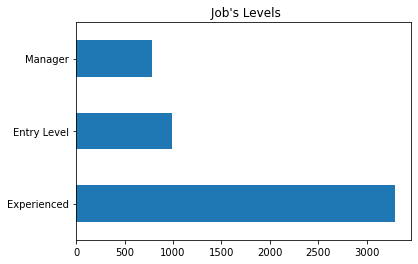

In [44]:
jobs['Level'].value_counts().plot(kind = 'barh' , title = " Job's Levels")

In [45]:
# SAVE DATA (BEFORE PROCESSING)
jobs_2020 = d.to_csv('Jobs_2020.csv')
jobs_2021 =d2.to_csv('Jobs_2021.csv')

In [47]:
jobs

,Job_Title,Company_Name,Job_Description,Level,Type,Job_Category
0,Business Development Specialist - Upper Egypt,golden,2+ Yrs of Exp · Business Development · Sale...,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,4+ Yrs of Exp · Software · Software Enginee...,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,6-10 Yrs of Exp · Software Development · In...,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,0-2 Yrs of Exp · Computer Science · Informa...,Entry Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,4-12 Yrs of Exp · AL Language · Azure SQL ·...,Experienced,Full Time,Software Engneering
...,...,...,...,...,...,...
5070,Senior .Net Developer (NetEDI),Cegedim,5+ Yrs of Exp · C# · .NET Core · Docker/Kube...,Experienced,Full Time,Software Engneering
5071,Senior Front End Developer,Automated Systems,3+ Yrs of Exp · Git · Software Development ·...,Experienced,Full Time,Software Engneering
5072,Senior PHP Developer - Nasr City,Maxycode,3-10 Yrs of Exp · Software Development · PHP...,Experienced,Full Time,Software Engneering
5073,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,Manager,Internship,Software Engneering


In [59]:
jobs['Years_of_experience'] = jobs['Job_Description'].str[:16]

In [61]:
jobs

,Job_Title,Company_Name,Job_Description,Level,Type,Job_Category,Years_of_experience
0,Business Development Specialist - Upper Egypt,golden,2+ Yrs of Exp · Business Development · Sale...,Experienced,Full Time,Software Engneering,2+ Yrs of Exp
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,4+ Yrs of Exp · Software · Software Enginee...,Experienced,Full Time,Software Engneering,4+ Yrs of Exp
2,Senior Software Developer,Bnsights,6-10 Yrs of Exp · Software Development · In...,Experienced,Full Time,Software Engneering,6-10 Yrs of E
3,Software Developer / Desktop Development,ITS,0-2 Yrs of Exp · Computer Science · Informa...,Entry Level,Full Time,Software Engneering,0-2 Yrs of Ex
4,Senior Software Developer -Dynamics 365...,CrossWorkers,4-12 Yrs of Exp · AL Language · Azure SQL ·...,Experienced,Full Time,Software Engneering,4-12 Yrs of E
...,...,...,...,...,...,...,...
5070,Senior .Net Developer (NetEDI),Cegedim,5+ Yrs of Exp · C# · .NET Core · Docker/Kube...,Experienced,Full Time,Software Engneering,5+ Yrs of Exp
5071,Senior Front End Developer,Automated Systems,3+ Yrs of Exp · Git · Software Development ·...,Experienced,Full Time,Software Engneering,3+ Yrs of Exp
5072,Senior PHP Developer - Nasr City,Maxycode,3-10 Yrs of Exp · Software Development · PHP...,Experienced,Full Time,Software Engneering,3-10 Yrs of Ex
5073,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,Manager,Internship,Software Engneering,Internship · Stu


In [75]:
jobs['Job_Description'] = jobs['Job_Description'].apply(lambda x: "" + x[18:])

In [76]:
jobs

,Job_Title,Company_Name,Job_Description,Level,Type,Job_Category,Years_of_experience
0,Business Development Specialist - Upper Egypt,golden,Business Development · Sales Skills · Sales ·...,Experienced,Full Time,Software Engneering,2+ Yrs of Exp
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Software · Software Engineering · Software De...,Experienced,Full Time,Software Engneering,4+ Yrs of Exp
2,Senior Software Developer,Bnsights,· Software Development · Information Technolo...,Experienced,Full Time,Software Engneering,6-10 Yrs of E
3,Software Developer / Desktop Development,ITS,· Computer Science · Information Technology (I...,Entry Level,Full Time,Software Engneering,0-2 Yrs of Ex
4,Senior Software Developer -Dynamics 365...,CrossWorkers,· AL Language · Azure SQL · C# · Computer Sci...,Experienced,Full Time,Software Engneering,4-12 Yrs of E
...,...,...,...,...,...,...,...
5070,Senior .Net Developer (NetEDI),Cegedim,C# · .NET Core · Docker/Kubernetes · LINQ · En...,Experienced,Full Time,Software Engneering,5+ Yrs of Exp
5071,Senior Front End Developer,Automated Systems,Git · Software Development · HTML5 · OOP · CSS...,Experienced,Full Time,Software Engneering,3+ Yrs of Exp
5072,Senior PHP Developer - Nasr City,Maxycode,· Software Development · PHP · Web · Framework...,Experienced,Full Time,Software Engneering,3-10 Yrs of Ex
5073,PHP Developer - intern,Magdsoft,nt · 0-1 Yrs of Exp · PHP · Laravel · CSS3 · H...,Manager,Internship,Software Engneering,Internship · Stu


In [80]:
jobs = jobs.rename(columns={'Job_Description':'Skills'})

In [81]:
jobs

,Job_Title,Company_Name,Skills,Level,Type,Job_Category,Years_of_experience
0,Business Development Specialist - Upper Egypt,golden,Business Development · Sales Skills · Sales ·...,Experienced,Full Time,Software Engneering,2+ Yrs of Exp
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Software · Software Engineering · Software De...,Experienced,Full Time,Software Engneering,4+ Yrs of Exp
2,Senior Software Developer,Bnsights,· Software Development · Information Technolo...,Experienced,Full Time,Software Engneering,6-10 Yrs of E
3,Software Developer / Desktop Development,ITS,· Computer Science · Information Technology (I...,Entry Level,Full Time,Software Engneering,0-2 Yrs of Ex
4,Senior Software Developer -Dynamics 365...,CrossWorkers,· AL Language · Azure SQL · C# · Computer Sci...,Experienced,Full Time,Software Engneering,4-12 Yrs of E
...,...,...,...,...,...,...,...
5070,Senior .Net Developer (NetEDI),Cegedim,C# · .NET Core · Docker/Kubernetes · LINQ · En...,Experienced,Full Time,Software Engneering,5+ Yrs of Exp
5071,Senior Front End Developer,Automated Systems,Git · Software Development · HTML5 · OOP · CSS...,Experienced,Full Time,Software Engneering,3+ Yrs of Exp
5072,Senior PHP Developer - Nasr City,Maxycode,· Software Development · PHP · Web · Framework...,Experienced,Full Time,Software Engneering,3-10 Yrs of Ex
5073,PHP Developer - intern,Magdsoft,nt · 0-1 Yrs of Exp · PHP · Laravel · CSS3 · H...,Manager,Internship,Software Engneering,Internship · Stu


In [82]:
# Save Data After Processing
JOBS= jobs.to_csv('JOBS.csv')

In [83]:
d3 = pd.read_csv('Wuzzuf14-16.csv')

In [84]:
d3

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,1/1/2014 20:01,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000.0,2500.0,1.0,Entry Level,2,1/2/2014 11:01,2940.0,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000.0,3500.0,1.0,Entry Level,2-Jan,1/2/2014 12:01,2042.0,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000.0,8000.0,1.0,Experienced (Non-Manager),3-Jan,1/21/2014 13:45,5684.0,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21917,cbbac897,Cairo,Creative Designer,Creative/Design,Select,Select,Media Production,Graphic Design,Advertising and PR Services,5000.0,6000.0,1.0,Experienced (Non-Manager),4-Jan,5/19/2016 10:05,0.0,&bull; Create advertising creative concepts fo...,&bull; 1-4 years web/graphic design experience...,Per Month,Egyptian Pound
21918,7724db49,Qalyubia,Health and Safety Manager - Qalyubia,Quality Assurance/Quality Control,Biotech/R&D/Science,Select,Manufacturing,Import and Export,Select,5000.0,7000.0,1.0,Manager,5+,5/19/2016 10:05,6.0,Health and Safety Managers are also known as o...,<ul>\r\n<li>At least 5 years of experience</li...,Per Month,Egyptian Pound
21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21920,6dcdc323,Cairo,E Markting,Marketing,Select,Select,Information Technology Services,Marketing and Advertising,Select,1000.0,1000.0,2.0,Student,0 to 1,5/19/2016 10:05,6.0,We are looking for E- marketing rep-mail accou...,e-markting rep : 1-<br />Collate and Writing d...,Per Month,Egyptian Pound


In [85]:
df3 = d3.copy()

In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14799 non-null  object 
 1   city              14732 non-null  object 
 2   job_title         14731 non-null  object 
 3   job_category1     14731 non-null  object 
 4   job_category2     14730 non-null  object 
 5   job_category3     14730 non-null  object 
 6   job_industry1     14730 non-null  object 
 7   job_industry2     14730 non-null  object 
 8   job_industry3     14730 non-null  object 
 9   salary_minimum    14730 non-null  float64
 10  salary_maximum    14730 non-null  float64
 11  num_vacancies     14730 non-null  float64
 12  career_level      14730 non-null  object 
 13  experience_years  14730 non-null  object 
 14  post_date         14730 non-null  object 
 15  views             14730 non-null  float64
 16  job_description   14540 non-null  object

In [87]:
# First drop usless columns
df3 = df3.drop(['id','salary_minimum','salary_maximum','post_date','views','num_vacancies','payment_period'
               , 'currency'], axis = 1)

In [88]:
df3

,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,career_level,experience_years,job_description,job_requirements
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,Entry Level,0-2,<p>&bull;Placing jobs' ads on various websites...,NaN
2,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,Entry Level,2,"<span style=""text-decoration: underline;""><str...",NaN
3,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,Entry Level,2-Jan,"<strong><span style=""text-decoration: underlin...",NaN
4,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,Experienced (Non-Manager),3-Jan,Job Title: Electrical Maintenance Engineer<br ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21917,Cairo,Creative Designer,Creative/Design,Select,Select,Media Production,Graphic Design,Advertising and PR Services,Experienced (Non-Manager),4-Jan,&bull; Create advertising creative concepts fo...,&bull; 1-4 years web/graphic design experience...
21918,Qalyubia,Health and Safety Manager - Qalyubia,Quality Assurance/Quality Control,Biotech/R&D/Science,Select,Manufacturing,Import and Export,Select,Manager,5+,Health and Safety Managers are also known as o...,<ul>\r\n<li>At least 5 years of experience</li...
21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21920,Cairo,E Markting,Marketing,Select,Select,Information Technology Services,Marketing and Advertising,Select,Student,0 to 1,We are looking for E- marketing rep-mail accou...,e-markting rep : 1-<br />Collate and Writing d...


In [89]:
# Rename columns to match 1st dataset names
df3 = df3.rename(columns={'job_title': 'Job_Title',
                     'company_names ':'Company_Name', 
                     ' job_description': 'Skills',
                      'career_level' : 'Level',
                         'experience_years':'Years_of_experience'}
                         )

In [90]:
df3['Job_Category'] = df3['job_category1']+df3['job_category2']+df3['job_category3']

In [91]:
df3

,city,Job_Title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,Level,Years_of_experience,job_description,job_requirements,Job_Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,Entry Level,0-2,<p>&bull;Placing jobs' ads on various websites...,NaN,Customer Service/SupportAdministrationHuman Re...
2,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,Entry Level,2,"<span style=""text-decoration: underline;""><str...",NaN,IT/Software DevelopmentSelectSelect
3,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,Entry Level,2-Jan,"<strong><span style=""text-decoration: underlin...",NaN,IT/Software DevelopmentSelectSelect
4,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,Experienced (Non-Manager),3-Jan,Job Title: Electrical Maintenance Engineer<br ...,NaN,EngineeringSelectSelect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21917,Cairo,Creative Designer,Creative/Design,Select,Select,Media Production,Graphic Design,Advertising and PR Services,Experienced (Non-Manager),4-Jan,&bull; Create advertising creative concepts fo...,&bull; 1-4 years web/graphic design experience...,Creative/DesignSelectSelect
21918,Qalyubia,Health and Safety Manager - Qalyubia,Quality Assurance/Quality Control,Biotech/R&D/Science,Select,Manufacturing,Import and Export,Select,Manager,5+,Health and Safety Managers are also known as o...,<ul>\r\n<li>At least 5 years of experience</li...,Quality Assurance/Quality ControlBiotech/R&D/S...
21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21920,Cairo,E Markting,Marketing,Select,Select,Information Technology Services,Marketing and Advertising,Select,Student,0 to 1,We are looking for E- marketing rep-mail accou...,e-markting rep : 1-<br />Collate and Writing d...,MarketingSelectSelect


In [92]:
df3 = df3.drop(['job_category1','job_category2','job_category3'], axis = 1)

In [93]:
df3 = df3.drop(['job_industry1','job_industry2','job_industry3'], axis = 1)

In [94]:
df3

,city,Job_Title,Level,Years_of_experience,job_description,job_requirements,Job_Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Entry Level,0-2,<p>&bull;Placing jobs' ads on various websites...,NaN,Customer Service/SupportAdministrationHuman Re...
2,Cairo,Junior Software Developer,Entry Level,2,"<span style=""text-decoration: underline;""><str...",NaN,IT/Software DevelopmentSelectSelect
3,Cairo,Application Support Engineer,Entry Level,2-Jan,"<strong><span style=""text-decoration: underlin...",NaN,IT/Software DevelopmentSelectSelect
4,Alexandria,Electrical Maintenance Engineer,Experienced (Non-Manager),3-Jan,Job Title: Electrical Maintenance Engineer<br ...,NaN,EngineeringSelectSelect
...,...,...,...,...,...,...,...
21917,Cairo,Creative Designer,Experienced (Non-Manager),4-Jan,&bull; Create advertising creative concepts fo...,&bull; 1-4 years web/graphic design experience...,Creative/DesignSelectSelect
21918,Qalyubia,Health and Safety Manager - Qalyubia,Manager,5+,Health and Safety Managers are also known as o...,<ul>\r\n<li>At least 5 years of experience</li...,Quality Assurance/Quality ControlBiotech/R&D/S...
21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21920,Cairo,E Markting,Student,0 to 1,We are looking for E- marketing rep-mail accou...,e-markting rep : 1-<br />Collate and Writing d...,MarketingSelectSelect


In [95]:
# Bcause this column has alot special characters and nans
df3 = df3.drop('job_requirements',axis =1)

In [98]:
df3 = df3.rename(columns = {'job_description':'Skills'})

In [99]:
df3

,city,Job_Title,Level,Years_of_experience,Skills,Job_Category
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Entry Level,0-2,<p>&bull;Placing jobs' ads on various websites...,Customer Service/SupportAdministrationHuman Re...
2,Cairo,Junior Software Developer,Entry Level,2,"<span style=""text-decoration: underline;""><str...",IT/Software DevelopmentSelectSelect
3,Cairo,Application Support Engineer,Entry Level,2-Jan,"<strong><span style=""text-decoration: underlin...",IT/Software DevelopmentSelectSelect
4,Alexandria,Electrical Maintenance Engineer,Experienced (Non-Manager),3-Jan,Job Title: Electrical Maintenance Engineer<br ...,EngineeringSelectSelect
...,...,...,...,...,...,...
21917,Cairo,Creative Designer,Experienced (Non-Manager),4-Jan,&bull; Create advertising creative concepts fo...,Creative/DesignSelectSelect
21918,Qalyubia,Health and Safety Manager - Qalyubia,Manager,5+,Health and Safety Managers are also known as o...,Quality Assurance/Quality ControlBiotech/R&D/S...
21919,NaN,NaN,NaN,NaN,NaN,NaN
21920,Cairo,E Markting,Student,0 to 1,We are looking for E- marketing rep-mail accou...,MarketingSelectSelect


In [100]:
df3.isnull().sum()

city                   7190
Job_Title              7191
Level                  7192
Years_of_experience    7192
Skills                 7382
Job_Category           7192
dtype: int64

In [101]:
#remove nulls
df3 = df3.dropna()

In [102]:
df3.isnull().sum()

city                   0
Job_Title              0
Level                  0
Years_of_experience    0
Skills                 0
Job_Category           0
dtype: int64

In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14540 entries, 1 to 21921
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 14540 non-null  object
 1   Job_Title            14540 non-null  object
 2   Level                14540 non-null  object
 3   Years_of_experience  14540 non-null  object
 4   Skills               14540 non-null  object
 5   Job_Category         14540 non-null  object
dtypes: object(6)
memory usage: 795.2+ KB


In [104]:
# Merge datasets together 
all_data = [jobs , df3]
All_Jobs = pd.concat(all_data)

In [106]:
All_Jobs

,Job_Title,Company_Name,Skills,Level,Type,Job_Category,Years_of_experience,city
0,Business Development Specialist - Upper Egypt,golden,Business Development · Sales Skills · Sales ·...,Experienced,Full Time,Software Engneering,2+ Yrs of Exp,NaN
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Software · Software Engineering · Software De...,Experienced,Full Time,Software Engneering,4+ Yrs of Exp,NaN
2,Senior Software Developer,Bnsights,· Software Development · Information Technolo...,Experienced,Full Time,Software Engneering,6-10 Yrs of E,NaN
3,Software Developer / Desktop Development,ITS,· Computer Science · Information Technology (I...,Entry Level,Full Time,Software Engneering,0-2 Yrs of Ex,NaN
4,Senior Software Developer -Dynamics 365...,CrossWorkers,· AL Language · Azure SQL · C# · Computer Sci...,Experienced,Full Time,Software Engneering,4-12 Yrs of E,NaN
...,...,...,...,...,...,...,...,...
21915,Senior Translator (English<>Arabic),NaN,<ul>\r\n<li>Software translation projects rela...,Experienced (Non-Manager),NaN,Editorial/WritingSelectSelect,9-Jun,Giza
21917,Creative Designer,NaN,&bull; Create advertising creative concepts fo...,Experienced (Non-Manager),NaN,Creative/DesignSelectSelect,4-Jan,Cairo
21918,Health and Safety Manager - Qalyubia,NaN,Health and Safety Managers are also known as o...,Manager,NaN,Quality Assurance/Quality ControlBiotech/R&D/S...,5+,Qalyubia
21920,E Markting,NaN,We are looking for E- marketing rep-mail accou...,Student,NaN,MarketingSelectSelect,0 to 1,Cairo


In [115]:
All_Jobs.isnull().sum()

Job_Title                  0
Company_Name           14540
Skills                     0
Level                      0
Type                   14540
Job_Category               0
Years_of_experience        0
city                    5075
dtype: int64

In [117]:
# fill nulls in company_name by 'hidden name'
All_Jobs['Company_Name'].fillna("Hidden Name",inplace=True)

In [118]:
All_Jobs.isnull().sum()

Job_Title                  0
Company_Name               0
Skills                     0
Level                      0
Type                   14540
Job_Category               0
Years_of_experience        0
city                    5075
dtype: int64

In [119]:
All_Jobs['Type'].value_counts()

Full Time                                     4910
Internship                                      84
Full Time And Part Time                         73
Full Time And Part Time And Work From Home       8
Name: Type, dtype: int64

In [122]:
# Because most of opportunities is full Time
# we will fill nan values with full Time
All_Jobs['Type']= All_Jobs['Type'].fillna('Full Time')

In [124]:
All_Jobs.isnull().sum()

Job_Title                 0
Company_Name              0
Skills                    0
Level                     0
Type                      0
Job_Category              0
Years_of_experience       0
city                   5075
dtype: int64

In [126]:
# drop city column
All_Jobs = All_Jobs.drop('city', axis=1)

In [127]:
All_Jobs

,Job_Title,Company_Name,Skills,Level,Type,Job_Category,Years_of_experience
0,Business Development Specialist - Upper Egypt,golden,Business Development · Sales Skills · Sales ·...,Experienced,Full Time,Software Engneering,2+ Yrs of Exp
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Software · Software Engineering · Software De...,Experienced,Full Time,Software Engneering,4+ Yrs of Exp
2,Senior Software Developer,Bnsights,· Software Development · Information Technolo...,Experienced,Full Time,Software Engneering,6-10 Yrs of E
3,Software Developer / Desktop Development,ITS,· Computer Science · Information Technology (I...,Entry Level,Full Time,Software Engneering,0-2 Yrs of Ex
4,Senior Software Developer -Dynamics 365...,CrossWorkers,· AL Language · Azure SQL · C# · Computer Sci...,Experienced,Full Time,Software Engneering,4-12 Yrs of E
...,...,...,...,...,...,...,...
21915,Senior Translator (English<>Arabic),Hidden Name,<ul>\r\n<li>Software translation projects rela...,Experienced (Non-Manager),Full Time,Editorial/WritingSelectSelect,9-Jun
21917,Creative Designer,Hidden Name,&bull; Create advertising creative concepts fo...,Experienced (Non-Manager),Full Time,Creative/DesignSelectSelect,4-Jan
21918,Health and Safety Manager - Qalyubia,Hidden Name,Health and Safety Managers are also known as o...,Manager,Full Time,Quality Assurance/Quality ControlBiotech/R&D/S...,5+
21920,E Markting,Hidden Name,We are looking for E- marketing rep-mail accou...,Student,Full Time,MarketingSelectSelect,0 to 1


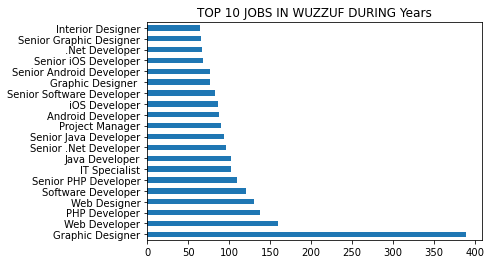

In [134]:
# Make some Visualizations <:
All_Jobs['Job_Title'].value_counts()[:20].plot(kind = 'barh' ,title= 'TOP 10 JOBS IN WUZZUF DURING Years')

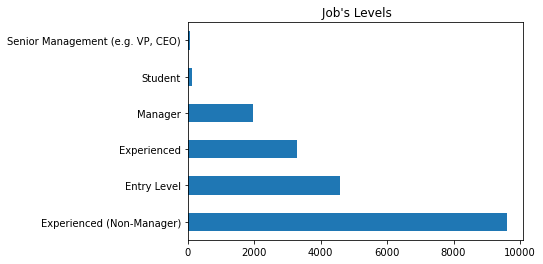

In [135]:
All_Jobs['Level'].value_counts().plot(kind = 'barh' , title = " Job's Levels")

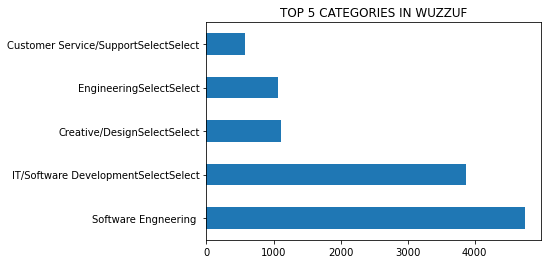

In [141]:
All_Jobs['Job_Category'].value_counts()[:5].plot(kind = 'barh' ,title= 'TOP 5 CATEGORIES IN WUZZUF')

 # Save the finally data set

In [143]:
ALL_JOBS = All_Jobs.to_csv('All_Jobs.csv')